## This Capstone is based on Airline arrival/departure data at 300+ airports across the country. It also includes information on Flight cancellations and delays.


## We often hear complaints about flights being delayed, cancelled or otherwise inconvenienced. Is this a function of a specific airline, is it due to specific airports one is flying out of or is it due to specific airport one is flying into?


## This project explores the answers to above questions in three sections. Additionally, this explores reasons for cancellations and some statistics on cancellations as well.

## The following cells import the needed python libraries for the commands.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### The following reads the 2008 airline arrival/departure data into a DataFrame. The file is about 650MB in size with about 7 million rows

In [2]:
df= pd.read_csv('2008_1.csv')

In [3]:
df.shape

(7009728, 29)

### The following command shows the columns contained in the DataFrame. CRSDepTime and CRSArrTime and CRSElapsedTime indicate scheduled times.  

In [4]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### Replace null values with zeros

In [5]:
df.fillna(0.0,inplace=True)

### Append an additonal column by calculating "Total Delay"

In [6]:
df['TotDelay'] = df['ActualElapsedTime'] - df['CRSElapsedTime']

### Shows unique months, Carriers, Flights and Tail numbers, followed by unique origin and destination airports

In [7]:
print(df.Month.nunique(),len(df.UniqueCarrier.unique()), len(df.FlightNum.unique()), len(df.TailNum.unique()), len(df.Origin.unique()),len(df.Dest.unique()))

12 20 7539 5374 303 304


In [8]:
df.UniqueCarrier.unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

### The following summarizes the DataFrame, grouping by Carrier into df_al_stat.

In [9]:
df_al_stat = pd.DataFrame(df.groupby('UniqueCarrier')['TotDelay'].describe().reset_index())

In [10]:
df_al_stat.head(10)

,UniqueCarrier,count,mean,std,min,25%,50%,75%,max
0,9E,262208.0,-5.230702,20.915116,-351.0,-11.0,-5.0,2.0,276.0
1,AA,604885.0,-5.663412,33.749575,-560.0,-10.0,-3.0,5.0,312.0
2,AQ,7800.0,-2.185641,16.507456,-375.0,-4.0,-1.0,2.0,38.0
3,AS,151102.0,-4.137013,22.883980,-414.0,-10.0,-3.0,4.0,192.0
4,B6,196091.0,-5.315364,35.255086,-605.0,-12.0,-4.0,5.0,350.0
5,CO,298455.0,-4.820834,28.718375,-635.0,-12.0,-4.0,4.0,395.0
6,DL,451931.0,-2.543762,25.659679,-604.0,-9.0,-2.0,6.0,368.0
7,EV,280575.0,-3.696644,19.292895,-202.0,-10.0,-4.0,4.0,312.0
8,F9,95762.0,-0.390384,15.088022,-412.0,-7.0,-1.0,5.0,222.0
9,FL,261684.0,-1.563183,19.330165,-323.0,-8.0,-2.0,5.0,251.0


### The above shows statistics by airline. However, since the data is by airline codes, it is helpful to decode. The cross reference of airline codes and names is loaded into df_al DataFrame

In [11]:
airline_series = np.array([
    ['1D','Radixx'],['9E','Pinnacle Airlines'],['AA','American Airlines'],['AQ','Aloha Airlines'],['AS','Alaska Airlines, Inc.'],['B6','JetBlue Airways'],['BB','Seaborne Airlines'],['CO','Continental Airlines'],['DL','Delta Air Lines'],['EV','ExpressJet'],['F9','Frontier Airlines'],['FL','AirTran Airways'],['HA','Hawaiian Airlines'],['MQ','American Eagle Airlines'],['NW','Northwest Airlines'],['OH','Comair'],['OO','SkyWest Airlines'],['UA','United Airlines'],['US','US Airways'],['WN','Southwest Airlines'],['XE','ExpressJet'],['YV','Mesa Airlines']
])
df_al = pd.DataFrame(airline_series, columns=['UniqueCarrier','Airline'])

In [12]:
df_al.head(10)

,UniqueCarrier,Airline
0,1D,Radixx
1,9E,Pinnacle Airlines
2,AA,American Airlines
3,AQ,Aloha Airlines
4,AS,"Alaska Airlines, Inc."
5,B6,JetBlue Airways
6,BB,Seaborne Airlines
7,CO,Continental Airlines
8,DL,Delta Air Lines
9,EV,ExpressJet


### The following code merges the cross reference DataFrame with df_al and the statistics are provided below

In [13]:
df_Carrier_stat = pd.DataFrame((pd.merge(df_al, df_al_stat, on='UniqueCarrier')).sort_values('75%',ascending=False))

In [14]:
df_Carrier_stat

,UniqueCarrier,Airline,count,mean,std,min,25%,50%,75%,max
12,NW,Northwest Airlines,347652.0,-0.308786,19.657385,-511.0,-8.0,-1.0,7.0,254.0
6,DL,Delta Air Lines,451931.0,-2.543762,25.659679,-604.0,-9.0,-2.0,6.0,368.0
13,OH,Comair,197607.0,-3.740434,27.862905,-320.0,-10.0,-2.0,6.0,355.0
19,YV,Mesa Airlines,254930.0,-3.600435,21.909240,-227.0,-8.0,-2.0,5.0,215.0
4,B6,JetBlue Airways,196091.0,-5.315364,35.255086,-605.0,-12.0,-4.0,5.0,350.0
8,F9,Frontier Airlines,95762.0,-0.390384,15.088022,-412.0,-7.0,-1.0,5.0,222.0
9,FL,AirTran Airways,261684.0,-1.563183,19.330165,-323.0,-8.0,-2.0,5.0,251.0
1,AA,American Airlines,604885.0,-5.663412,33.749575,-560.0,-10.0,-3.0,5.0,312.0
18,XE,ExpressJet,374510.0,-4.131609,25.749096,-247.0,-9.0,-3.0,4.0,412.0
3,AS,"Alaska Airlines, Inc.",151102.0,-4.137013,22.883980,-414.0,-10.0,-3.0,4.0,192.0


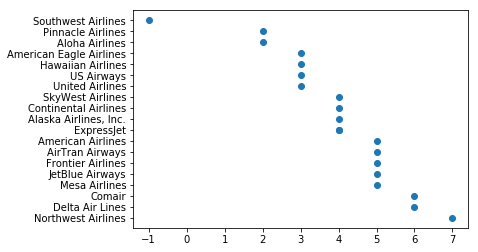

In [15]:
plt.scatter(y=df_Carrier_stat['Airline'], x=df_Carrier_stat['75%'])
plt.show()

### Looking at the table/graph above in the column '75%', it is surprising to see that 75% of the flights for any airline are delayed at most by 7 minutes! So, by and large the flights are on time. Southwest eins by being the only airline where 75% of teh flights are early by a minute or more!

In [16]:
df_O_TotDelay = pd.DataFrame(df.groupby('Origin')['TotDelay'].describe().reset_index())

len(df_O_TotDelay)

303

In [17]:
df_O_TotDelay.sort_values('75%',ascending=False).head(10)

,Origin,count,mean,std,min,25%,50%,75%,max
232,PUB,2.0,47.000000,31.112698,25.0,36.0,47.0,58.0,69.0
144,ITH,132.0,-0.075758,31.906261,-93.0,-1.0,4.0,13.0,73.0
212,OTH,515.0,1.456311,23.122738,-120.0,-5.0,4.0,12.5,73.0
301,YKM,340.0,3.467647,15.034341,-90.0,-3.0,4.0,11.0,62.0
110,GCC,1046.0,3.235182,19.090370,-116.0,-5.0,3.0,11.0,105.0
242,RKS,954.0,2.166667,18.899927,-93.0,-2.0,4.0,10.0,188.0
150,JFK,118804.0,-6.839585,44.830321,-605.0,-17.0,-5.0,9.0,368.0
277,STX,436.0,-1.490826,27.822630,-253.0,-5.0,0.0,8.0,91.0
239,RFD,290.0,-1.062069,25.586469,-165.0,-7.0,0.0,8.0,68.0
45,BTV,7005.0,-1.734475,24.645442,-205.0,-10.0,-2.0,8.0,192.0


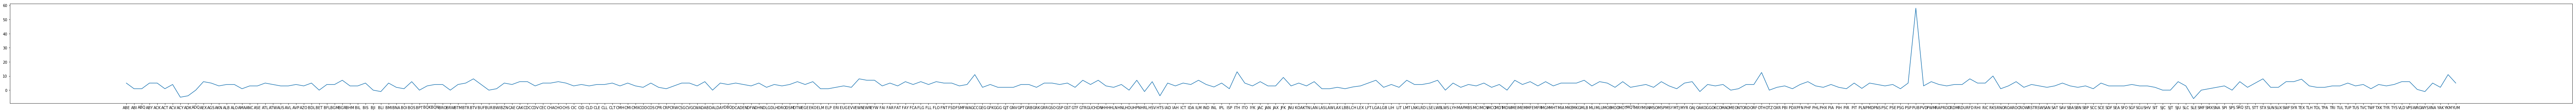

In [18]:
plt.figure(figsize=(125,5))
plt.plot(df_O_TotDelay['Origin'],df_O_TotDelay['75%'])

plt.show()

### Similar question on whether a particluar originating airport could be the reason for delayed flights  shows according to the above graph and table, that except for one airport, in all other cases the flights were less than 15 minutes late.

In [19]:
df_D_TotDelay = pd.DataFrame(df.groupby('Dest')['TotDelay'].describe().reset_index())
len(df_D_TotDelay)

304

In [20]:
df_D_TotDelay.sort_values('75%',ascending=False).head(10)

,Dest,count,mean,std,min,25%,50%,75%,max
269,SLE,484.0,8.371901,16.193643,-23.0,-4.00,9.0,17.00,110.0
302,YKM,338.0,3.973373,13.506209,-100.0,-3.00,3.0,12.00,45.0
214,OTH,517.0,2.404255,19.323165,-114.0,-2.00,4.0,11.00,49.0
4,ACK,469.0,-5.119403,37.665172,-300.0,-17.00,-3.0,10.00,165.0
8,ADK,102.0,-18.892157,60.931857,-198.0,-12.75,-1.5,9.75,32.0
163,LGA,119117.0,-6.006498,35.684614,-450.0,-13.00,-4.0,8.00,350.0
111,GCC,1046.0,-0.066922,16.266363,-105.0,-7.00,1.0,8.00,109.0
151,JFK,118802.0,-5.664366,37.607896,-536.0,-13.00,-4.0,7.00,350.0
267,SJU,21691.0,-3.160481,25.901189,-291.0,-11.00,-3.0,6.00,187.0
18,ATL,414521.0,-1.992283,22.349751,-533.0,-9.00,-2.0,6.00,274.0


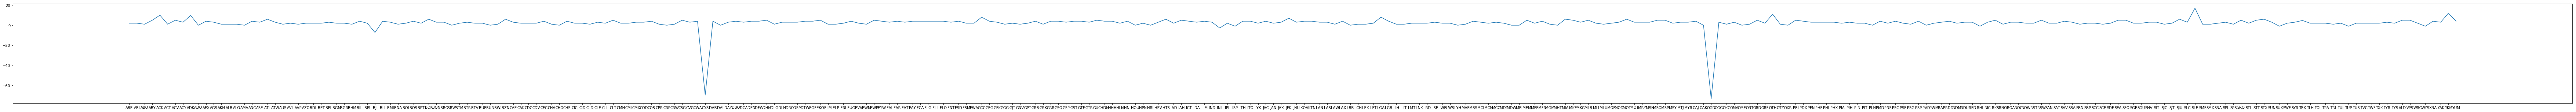

In [21]:
plt.figure(figsize=(125,5))
plt.plot(df_D_TotDelay['Dest'],df_D_TotDelay['75%'])

plt.show()


### Question on whether flying to a particular destimation airport can cause delayed flights comes up with a similar answer - except for two airports, 75% of the flights to any airport are less than 15 minutes late.

## So, we can conclude that most flights were less than 15 minutes late and were not affected by the airline, originating or destination airports.

In [22]:
df_big_delay = pd.DataFrame(df[df['TotDelay'] >60])


## The following is an analysis of the reason for highly dealyed flights - arbitrarily defined as being more than an hour late. 

In [23]:
print (len(df_big_delay), len(df_big_delay[df_big_delay['NASDelay'] >0]))

35110 34303


### The above numbers show that out of 35,110 flights that fell into this category, a huge majority - 34,303 was due to NASDelay (National Air System delay) , delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control. These are certainly beyond human control.

In [24]:
cancelled_flight = df['Cancelled'] == 1

In [25]:
df_cancelled = pd.DataFrame(df[cancelled_flight].groupby('UniqueCarrier').count().reset_index())


## The following analysis tries to figure out if a particular airline is more prone to delay than others. df_cancelled DataFrame is a slice of cancelled flights from the main data file.

In [26]:
df_cancelled.rename(columns={'Year': 'cancel_count'}, inplace=True)
df_cancelled

,UniqueCarrier,cancel_count,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotDelay
0,9E,7100,7100,7100,7100,7100,7100,7100,7100,7100,...,7100,7100,7100,7100,7100,7100,7100,7100,7100,7100
1,AA,17440,17440,17440,17440,17440,17440,17440,17440,17440,...,17440,17440,17440,17440,17440,17440,17440,17440,17440,17440
2,AQ,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
3,AS,2139,2139,2139,2139,2139,2139,2139,2139,2139,...,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139
4,B6,3205,3205,3205,3205,3205,3205,3205,3205,3205,...,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205
5,CO,3702,3702,3702,3702,3702,3702,3702,3702,3702,...,3702,3702,3702,3702,3702,3702,3702,3702,3702,3702
6,DL,6813,6813,6813,6813,6813,6813,6813,6813,6813,...,6813,6813,6813,6813,6813,6813,6813,6813,6813,6813
7,EV,5026,5026,5026,5026,5026,5026,5026,5026,5026,...,5026,5026,5026,5026,5026,5026,5026,5026,5026,5026
8,F9,303,303,303,303,303,303,303,303,303,...,303,303,303,303,303,303,303,303,303,303
9,FL,2236,2236,2236,2236,2236,2236,2236,2236,2236,...,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236


In [27]:
df_cancelled_trunc = df_cancelled[['UniqueCarrier','cancel_count']]

In [28]:
df_cancelled_trunc

,UniqueCarrier,cancel_count
0,9E,7100
1,AA,17440
2,AQ,42
3,AS,2139
4,B6,3205
5,CO,3702
6,DL,6813
7,EV,5026
8,F9,303
9,FL,2236


### df_cancelled_trunc slices a couple of columns from the dataset to compare with the total flights from df_al_stat_trunc

In [29]:
df_al_stat_trunc = df_al_stat[['UniqueCarrier','count']]

In [30]:
pd_cancelled_stat = pd.DataFrame(pd.merge(df_cancelled_trunc, df_al_stat_trunc))

In [31]:
pd_cancelled_stat['Perc'] = (1- pd_cancelled_stat['cancel_count']/pd_cancelled_stat['count'])*100


In [32]:
pd_cancelled_stat_by_airline= pd.DataFrame(pd.merge(pd_cancelled_stat,df_Carrier_stat,on='UniqueCarrier').sort_values(['Perc'],ascending=[False]))

In [33]:
pd_cancelled_stat_by_airline

,UniqueCarrier,cancel_count,count_x,Perc,Airline,count_y,mean,std,min,25%,50%,75%,max
8,F9,303,95762.0,99.683591,Frontier Airlines,95762.0,-0.390384,15.088022,-412.0,-7.0,-1.0,5.0,222.0
2,AQ,42,7800.0,99.461538,Aloha Airlines,7800.0,-2.185641,16.507456,-375.0,-4.0,-1.0,2.0,38.0
12,NW,2906,347652.0,99.164107,Northwest Airlines,347652.0,-0.308786,19.657385,-511.0,-8.0,-1.0,7.0,254.0
9,FL,2236,261684.0,99.145534,AirTran Airways,261684.0,-1.563183,19.330165,-323.0,-8.0,-2.0,5.0,251.0
10,HA,570,61826.0,99.078058,Hawaiian Airlines,61826.0,0.166176,16.432576,-542.0,-2.0,0.0,3.0,1034.0
17,WN,12389,1201754.0,98.969090,Southwest Airlines,1201754.0,-6.362135,15.882796,-370.0,-10.0,-5.0,-1.0,302.0
5,CO,3702,298455.0,98.759612,Continental Airlines,298455.0,-4.820834,28.718375,-635.0,-12.0,-4.0,4.0,395.0
3,AS,2139,151102.0,98.584400,"Alaska Airlines, Inc.",151102.0,-4.137013,22.883980,-414.0,-10.0,-3.0,4.0,192.0
16,US,6582,453589.0,98.548907,US Airways,453589.0,-4.949981,24.480483,-413.0,-12.0,-5.0,3.0,361.0
6,DL,6813,451931.0,98.492469,Delta Air Lines,451931.0,-2.543762,25.659679,-604.0,-9.0,-2.0,6.0,368.0


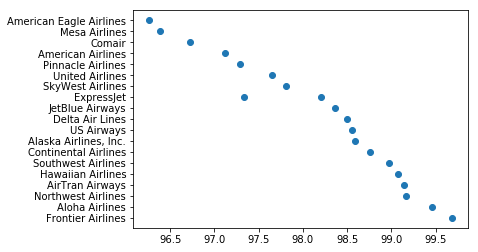

In [34]:
plt.scatter(y=pd_cancelled_stat_by_airline['Airline'], x=pd_cancelled_stat_by_airline['Perc'])
plt.show()

## The above table indicates even though other airlines have a better non-cancellaion percentage, Southwest, Us Airways and Delta standout for their low cancellation rate despite their huge number of flights.

## An additional observation is that Southwest turns out to be the best in terms of on-time performance and low cancellation rate, despite having the highest volume of flights at roughly one and a quarter million flights. Southwest has always had a great reputation and a very good Wall street performance and the data shows the reason could be solid operational performance. 

In [35]:
df.groupby('UniqueCarrier').quantile(.90).sort_values(['TotDelay'])


0.9,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,Cancelled,CarrierDelay,DayOfWeek,...,FlightNum,LateAircraftDelay,Month,NASDelay,SecurityDelay,TaxiIn,TaxiOut,TotDelay,WeatherDelay,Year
UniqueCarrier,,,,,,,,,,,,,,,,,,,,,
WN,186.0,169.0,31.0,2144.0,2140.0,1955.0,195.0,0.0,0.0,7.0,...,3232.0,16.0,11.0,0.0,0.0,7.0,16.0,5.0,0.0,2008.0
AQ,297.0,283.0,7.0,2104.0,2112.0,1955.0,299.0,0.0,0.0,7.0,...,481.0,0.0,2.0,0.0,0.0,5.0,12.0,5.0,0.0,2008.0
HA,326.0,305.0,13.0,2118.0,2119.0,1952.0,330.0,0.0,0.0,7.0,...,513.0,0.0,11.0,0.0,0.0,7.0,15.0,7.0,0.0,2008.0
OO,145.0,120.0,35.0,2119.0,2118.0,1950.0,145.0,0.0,0.0,7.0,...,6589.0,0.0,11.0,0.0,0.0,10.0,24.0,11.0,0.0,2008.0
9E,140.0,109.0,32.0,2125.0,2135.0,1930.0,141.0,0.0,0.0,7.0,...,5900.0,0.0,11.0,3.0,0.0,15.0,29.0,12.0,0.0,2008.0
MQ,142.0,115.0,46.0,2053.0,2050.0,1910.0,140.0,0.0,0.0,7.0,...,4670.0,15.0,11.0,10.0,0.0,12.0,26.0,12.0,0.0,2008.0
EV,135.0,109.0,47.0,2100.0,2051.0,1930.0,136.0,0.0,14.0,7.0,...,5343.0,0.0,11.0,9.0,0.0,14.0,28.0,12.0,0.0,2008.0
YV,139.0,111.0,50.0,2120.0,2117.0,1958.0,139.0,0.0,21.0,7.0,...,7281.0,0.0,11.0,0.0,0.0,11.0,29.0,12.0,0.0,2008.0
F9,203.0,179.0,29.0,2245.0,2257.0,2010.0,203.0,0.0,3.0,7.0,...,821.0,0.0,11.0,15.0,0.0,10.0,22.0,13.0,0.0,2008.0


### 90% of all flights arrive within 17 minutes of scheduled time. 90% of Southwest flights arrive within 5 minutes of scheduled time!

In [36]:
df_O_90th_perc = pd.DataFrame(df.groupby('Origin').quantile(.90).sort_values(['TotDelay']).reset_index())

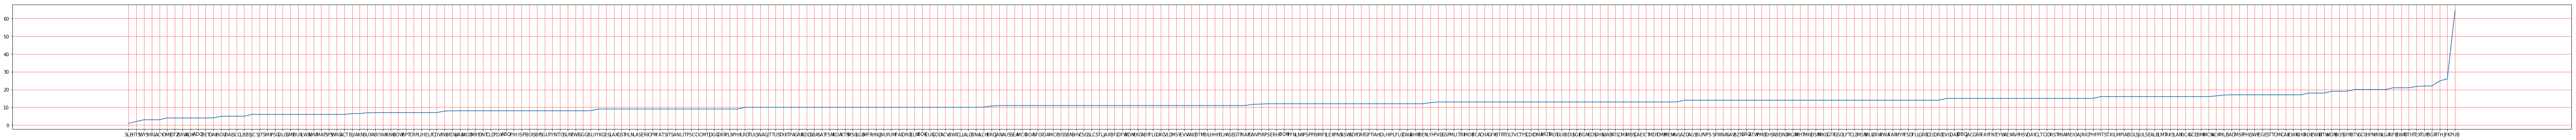

In [37]:
plt.figure(figsize=(100,5))
plt.plot(df_O_90th_perc['Origin'],df_O_90th_perc['TotDelay'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.show()

### Except for a handful of originating airports, most flights arrive within 15-20 minutes of scheduled time.

In [38]:
df_D_90th_perc = pd.DataFrame(df.groupby('Dest').quantile(.90).sort_values(['TotDelay']).reset_index())

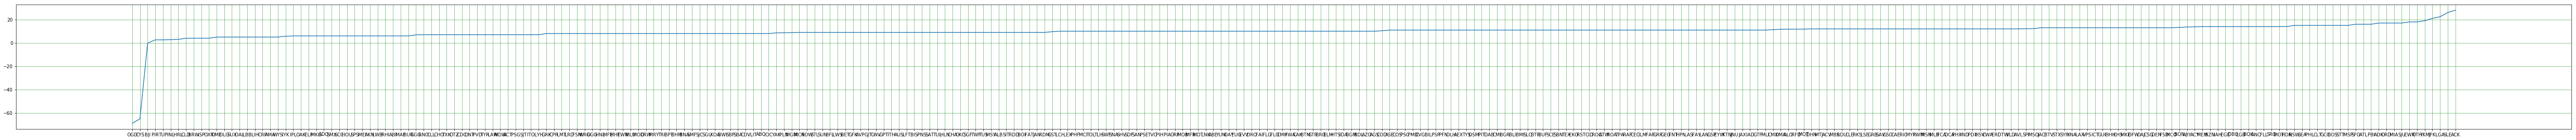

In [39]:
plt.figure(figsize=(100,5))
plt.plot(df_D_90th_perc['Dest'],df_D_90th_perc['TotDelay'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

### Except for a handful of destination airports, most flights arrive within 15-20 minutes of scheduled time.

# I would have liked to do analysis across the years to study if there was improvement, but the datasets are huge. Another analysis I would like to do is how the same tail number is used in a given day, month etc., and whether specific airlines are more efficient in doing so. Another comparison I would like to do is the change in behavioral patterns based on the distance traveled in each leg and find statistics based on total airline miles rather than total flights.